# Clustering K-Means


In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score

In [120]:
# Carregando dados de um arquivo CSV
url = 'https://raw.githubusercontent.com/michelrubens/clustering_k-means_imdb-2024/main/IMDb_Dataset_2.csv'

# Carregando dados diretamente no código
dados = pd.read_csv(url, sep = ',')
print(len(dados))
dados.head(5)

3173


,Title,IMDb Rating,Year,Certificates,Genre,Director,Star Cast,MetaScore,Poster-src,Duration (minutes)
0,End of the Spear,6.8,2005,PG-13,Adventure,Jim Hanon,Louie LeonardoChad AllenJack Guzman,45.0,https://m.media-amazon.com/images/M/MV5BMTYxOT...,108.0
1,Elvira Madigan,7.0,1967,PG,Biography,Bo Widerberg,Pia DegermarkThommy BerggrenLennart Malmer,66.0,https://m.media-amazon.com/images/M/MV5BMmY2Nj...,91.0
2,The Kid Stays in the Picture,7.3,2002,R,Documentary,Nanette Burstein,Robert EvansEddie AlbertPeter Bart,75.0,https://m.media-amazon.com/images/M/MV5BZjhiZm...,93.0
3,It Ain't Over,8.2,2022,PG,Documentary,Sean Mullin,Andy AndresRoger AngellMarty Appel,79.0,https://m.media-amazon.com/images/M/MV5BZWViYW...,99.0
4,Mahler,7.0,1974,PG,Biography,Ken Russell,Robert PowellGeorgina HaleLee Montague,66.0,https://m.media-amazon.com/images/M/MV5BYzY4Mz...,115.0


In [121]:
# Verifique se há valores ausentes
print(dados.isnull().sum())

Title                 0
IMDb Rating           0
Year                  0
Certificates          0
Genre                 0
Director              0
Star Cast             0
MetaScore             0
Poster-src            0
Duration (minutes)    0
dtype: int64


In [122]:
# Verifica os tipos dos dados
dados.dtypes

Title                  object
IMDb Rating           float64
Year                    int64
Certificates           object
Genre                  object
Director               object
Star Cast              object
MetaScore             float64
Poster-src             object
Duration (minutes)    float64
dtype: object

In [127]:
# Apenas nos interessa o usuário e os generos que ele gosta
director_genres = dados[['Director', 'Genre']]
director_genres.head(5)

,Director,Genre
0,Jim Hanon,Adventure
1,Bo Widerberg,Biography
2,Nanette Burstein,Documentary
3,Sean Mullin,Documentary
4,Ken Russell,Biography


In [129]:
# Selecione as colunas relevantes
genres = director_genres['Genre']
director = director_genres['Director']

In [130]:
genres.unique()

array(['Adventure', 'Biography', 'Documentary', 'Action', 'Animation',
       'Drama', 'Crime', 'Comedy', 'Family', 'Horror', 'Fantasy',
       'Sci-Fi', 'Musical', 'Mystery', 'Romance', 'History', 'Reality-TV'],
      dtype=object)

In [131]:
# Crie uma nova matriz para armazenar os gêneros codificados
encoded_genres = pd.get_dummies(genres)

# Combine os gêneros codificados com o restante dos dados
director_genres = pd.concat([director, encoded_genres], axis=1)

# Visualize os primeiros 5 registros
director_genres.head(5)

,Director,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Musical,Mystery,Reality-TV,Romance,Sci-Fi
0,Jim Hanon,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Bo Widerberg,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Nanette Burstein,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,Sean Mullin,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Ken Russell,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [133]:
# Agrupamos os dados por diretor, somando as demais colunas

# Isso resulta em quantos filmes de cada gênero o usuário gostou
director_movies = director_genres.groupby('Director').agg('sum').reset_index()

# Coluna com a soma total (excluindo o Director)
director_movies['total'] = director_movies.iloc[:, 1:].sum(axis=1)

# Divide todas as colunas (exceto Director) pelo 'total'
director_movies.iloc[:,1:] = director_movies.iloc[:,1:].div(director_movies.total, axis=0)

# Podemos agora retirar o total
director_movies.drop('total', axis=1, inplace = True)
director_movies.set_index('Director', inplace = True)
director_movies.head(5)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Musical,Mystery,Reality-TV,Romance,Sci-Fi
Director,,,,,,,,,,,,,,,,,
A.J. Edwards,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Arendt,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Horvath,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Mento,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron N. Feldman,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

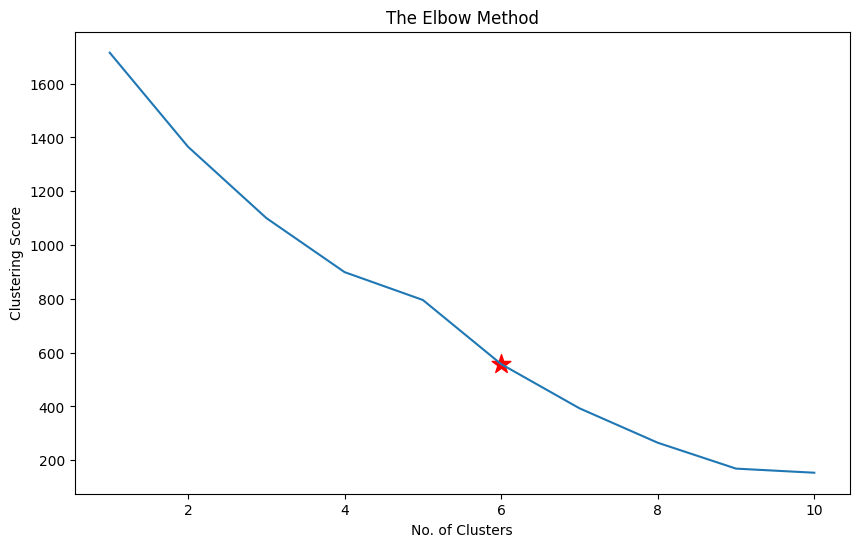

In [144]:
# Vamos gerar os grupos de usuários
clustering_score = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(director_movies)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

# Visualizando o gráfico
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(6,clustering_score[5], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [145]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='random', random_state=0)
    kmeans.fit(director_movies)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(director_movies, labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

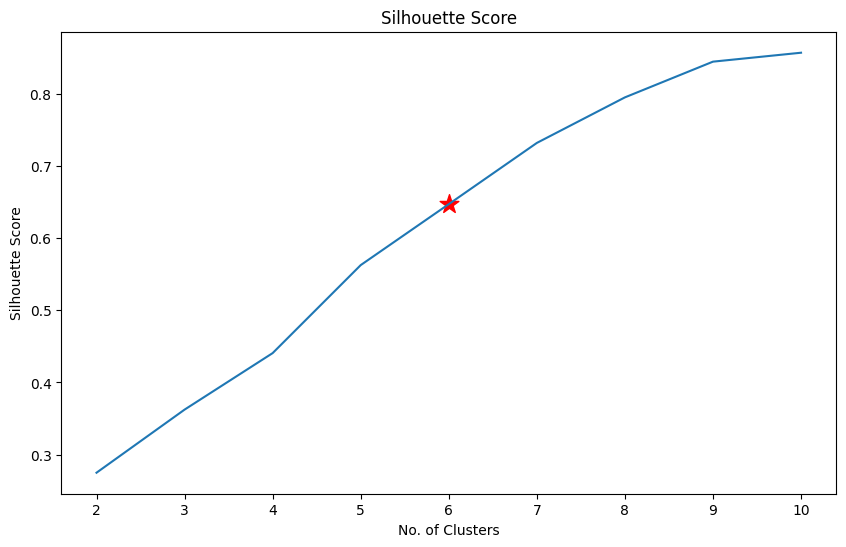

In [146]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('No. of Clusters')
plt.ylabel('Silhouette Score')
plt.scatter(6,silhouette_scores[4], s = 200, c = 'red', marker='*')
plt.show()

In [201]:
# Para encontrar a melhor quantidade de grupos veja: https://medium.com/pizzadedados/kmeans-e-metodo-do-cotovelo-94ded9fdf3a9
model = KMeans(n_clusters= 6)
model.fit(director_movies)
# Predição dos grupos para cada diretor
group = model.predict(director_movies)
# Podemos sugerir para um usuário filmes que outros membros do grupo gostaram
director_movies.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Musical,Mystery,Reality-TV,Romance,Sci-Fi
Director,,,,,,,,,,,,,,,,,
A.J. Edwards,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Arendt,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Horvath,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Mento,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron N. Feldman,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Nee,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Rotan,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Schneider,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Sorkin,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
# PCA (Principal Component Analysis: https://builtin.com/data-science/step-step-explanation-principal-component-analysis) com 2 componentes
# O correto seria verificar a melhor quantidade de componentes (exemplo: https://www.kaggle.com/code/jeanc2020/pca-clustering-kmeans)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(director_movies)

# Converte em dataframe
df_pca = pd.DataFrame(data=pca_array, index=director_movies.index.copy())
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['group'] = group

df_pca.head()

,PC1,PC2,group
Director,,,
A.J. Edwards,0.824872,-0.053008,1
Aaron Arendt,-0.403537,-0.689418,0
Aaron Horvath,-0.122375,0.011196,5
Aaron Mento,-0.162076,0.022667,5
Aaron N. Feldman,-0.084215,0.009954,5


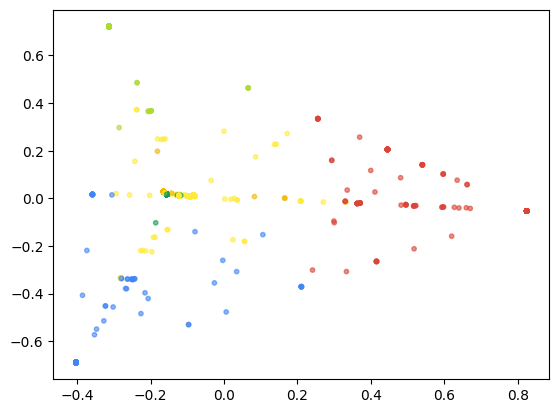

In [211]:
colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#ABDA32', '#FFEB3B']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})

plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['color'], alpha = 0.6, s=10)

In [212]:
# Com 3 componentes
pca = PCA(n_components=3)
pca_array = pca.fit_transform(director_movies)

# Converte em dataframe
df_pca = pd.DataFrame(data=pca_array, index=director_movies.index.copy())
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['group'] = group

df_pca.head()

,PC1,PC2,PC3,group
Director,,,,
A.J. Edwards,0.824872,-0.053008,-0.122530,1
Aaron Arendt,-0.403537,-0.689418,-0.411626,0
Aaron Horvath,-0.122375,0.011196,0.199533,5
Aaron Mento,-0.162076,0.022667,0.447104,5
Aaron N. Feldman,-0.084215,0.009954,0.107914,5


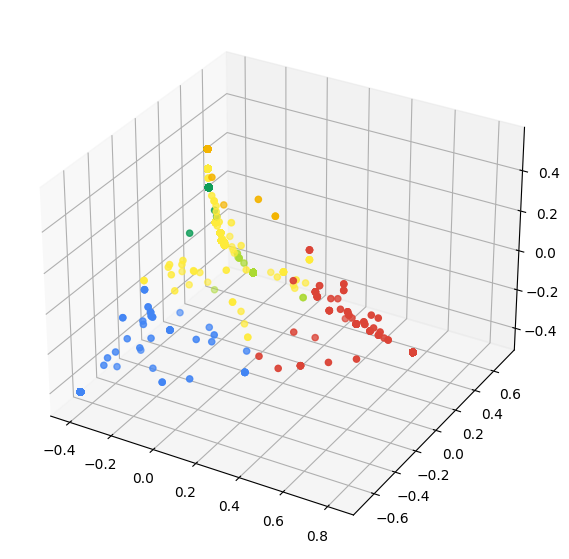

In [213]:
colors = ['#4285F4', '#DB4437', '#F4B400', '#0F9D58', '#ABDA32', '#FFEB3B']
df_pca['color'] = df_pca['group'].map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5]})

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['color'])

# show plot
plt.show()